In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import data_collections

In [3]:
import utils
cluster, client = utils.get_ClusterClient()
cluster.scale(24) #adapt(minimum_jobs=0, maximum_jobs=24)
client

Client Scheduler: tcp://10.12.206.60:33776 Dashboard: https://jupyterhub.hpc.ucar.edu/stable/user/mclong/proxy/8787/status,Cluster Workers: 0 Cores: 0 Memory: 0 B


In [4]:
query = dict(experiment='historical', stream='pop.h')
epoch_mean = data_collections.epoch_mean('present_day', query)
epoch_mean

cannot read cache: funnel-catalog/funnel-catalog-entry-520aa7ef85f0fa067001716372aacd23.yml...skipping
skipping
cannot read cache: funnel-catalog/funnel-catalog-entry-d389ba227ee710a26630db8efb167bfc.yml...skipping
skipping
cannot read cache: funnel-catalog/funnel-catalog-entry-e58ff299751c918e19d86049b3574966.yml...skipping
skipping


In [15]:
dsets = epoch_mean.dsets('FG_CO2', clobber=False)
dsets

{'ocn.historical.pop.h': <xarray.Dataset>
 Dimensions:                 (lat_aux_grid: 395, member_id: 11, moc_z: 61, nlat: 384, nlon: 320, z_t: 60, z_t_150m: 15, z_w: 60, z_w_bot: 60, z_w_top: 60)
 Coordinates:
   * z_t                     (z_t) float32 500.0 1.5e+03 ... 5.125e+05 5.375e+05
   * z_t_150m                (z_t_150m) float32 500.0 1.5e+03 ... 1.45e+04
   * z_w                     (z_w) float32 0.0 1e+03 2e+03 ... 5e+05 5.25e+05
   * z_w_top                 (z_w_top) float32 0.0 1e+03 2e+03 ... 5e+05 5.25e+05
   * z_w_bot                 (z_w_bot) float32 1e+03 2e+03 ... 5.25e+05 5.5e+05
   * lat_aux_grid            (lat_aux_grid) float32 -79.49 -78.95 ... 89.47 90.0
   * moc_z                   (moc_z) float32 0.0 1e+03 2e+03 ... 5.25e+05 5.5e+05
   * member_id               (member_id) int64 1 2 3 4 5 6 7 8 9 10 11
 Dimensions without coordinates: nlat, nlon
 Data variables: (12/55)
     dz                      (z_t) float32 ...
     dzw                     (z_w) float32 

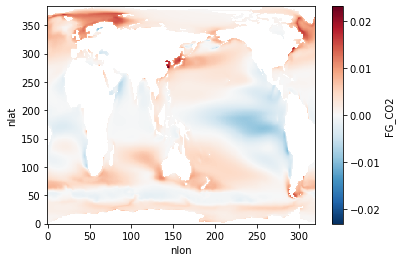

In [16]:
dsets['ocn.historical.pop.h'].FG_CO2.mean('member_id').plot()